Loaded case_001 → 30 points (using t=1818.13)
Loaded case_002 → 30 points (using t=1813.69)
Loaded case_003 → 30 points (using t=1800.02)
Loaded case_004 → 30 points (using t=1802.00)
Loaded case_005 → 30 points (using t=1802.72)


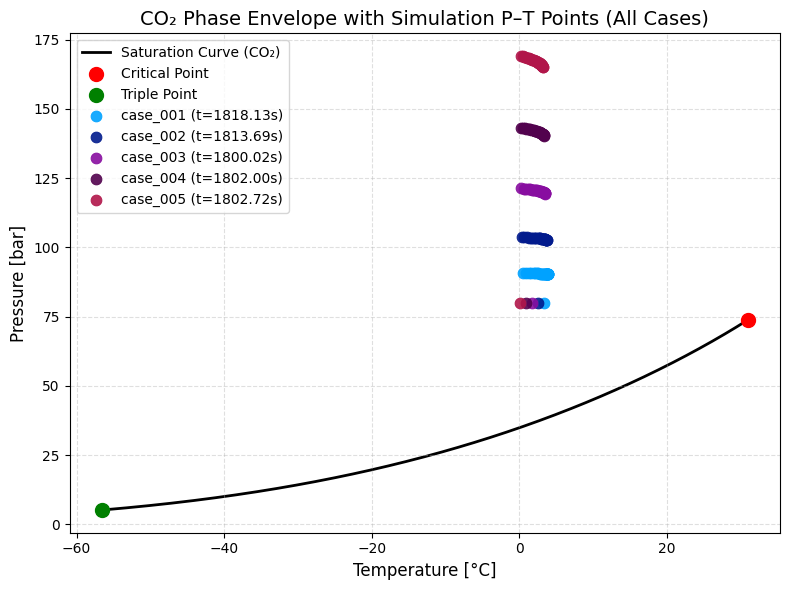

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from CoolProp.CoolProp import PropsSI
import os

# ---------------------------------------------------------
# USER INPUT: Define root folder and cases
# ---------------------------------------------------------

root = r"runs/05_12_25/run_10_44"
case_ids = ["case_001", "case_002", "case_003", "case_004", "case_005"]

profile_file = "profiles/Flowline.csv"
target_time = 1818.133966109333   # SAME timestamp across all cases


# ---------------------------------------------------------
# Helper: Load P–T points for a single case
# ---------------------------------------------------------

def load_PT_points(case_path, target_time):
    csv_path = os.path.join(case_path, profile_file)
    df = pd.read_csv(csv_path, skiprows=[1], encoding="latin1")

    df = df[["time", "position", "Pressure", "Temperature - average"]]
    df = df.dropna(subset=["Pressure", "Temperature - average"])

    # --- Find nearest time instead of exact match ---
    df["time_diff"] = abs(df["time"] - target_time)
    best_time = df.loc[df["time_diff"].idxmin(), "time"]

    df_t = df[df["time"] == best_time].sort_values("position")

    return df_t["Pressure"].values, df_t["Temperature - average"].values, best_time


# ---------------------------------------------------------
# Load P–T data for all cases
# ---------------------------------------------------------

all_pressures = []
all_temperatures = []
labels = []

for case in case_ids:
    case_path = os.path.join(root, case)
    try:
        P, T, used_time = load_PT_points(case_path, target_time)
        all_pressures.append(P)
        all_temperatures.append(T)
        labels.append(f"{case} (t={used_time:.2f}s)")
        print(f"Loaded {case} → {len(P)} points (using t={used_time:.2f})")
    except FileNotFoundError:
        print(f"WARNING: Missing file for {case}")
        continue



# ---------------------------------------------------------
# CO₂ Phase Envelope
# ---------------------------------------------------------

Ttr = PropsSI("Ttriple", "CO2")
Tcrit = PropsSI("Tcrit", "CO2")
Ptr = PropsSI("ptriple", "CO2")
Pcrit = PropsSI("pcrit", "CO2")

Tc = Tcrit - 273.15
Pc = Pcrit / 1e5
Tt = Ttr - 273.15
Pt = Ptr / 1e5

T_sat = np.linspace(Ttr, Tcrit, 400)
P_sat = []

for T in T_sat:
    try:
        P = PropsSI("P", "T", T, "Q", 0, "CO2")
        P_sat.append(P)
    except:
        P_sat.append(np.nan)

P_sat = np.array(P_sat)
T_sat_C = T_sat - 273.15
P_sat_bar = P_sat / 1e5


# ---------------------------------------------------------
# Plotting
# ---------------------------------------------------------

plt.figure(figsize=(8,6))

# Phase envelope curve
plt.plot(T_sat_C, P_sat_bar,
         color="black", linewidth=2,
         label="Saturation Curve (CO₂)", zorder=1)

# Critical point
plt.scatter(Tc, Pc, color="red",
            s=100, label="Critical Point", zorder=5)

# Triple point
plt.scatter(Tt, Pt, color="green", 
            s=100, label="Triple Point", zorder=5)

# --- Plot simulation data for ALL cases ---
colors = ["#00a2ff", "#021b8d", "#880ea0", "#52024E", "#B1164A"]

for P_bar, T_C, label, c in zip(all_pressures, all_temperatures, labels, colors):
    plt.scatter(
        T_C, P_bar,
        s=60, color=c, alpha=0.9,
        linewidth=0.7, label=label, zorder=10
    )

# Axes, formatting
plt.xlabel("Temperature [°C]", fontsize=12)
plt.ylabel("Pressure [bar]", fontsize=12)
plt.title("CO₂ Phase Envelope with Simulation P–T Points (All Cases)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4, zorder=0)
plt.legend(frameon=True, fontsize=10, loc="upper left")
plt.tight_layout()

plt.show()


Loaded case_001 → 30 points (using t=1806.64)
Loaded case_002 → 30 points (using t=1803.57)
Loaded case_003 → 30 points (using t=1800.61)
Loaded case_004 → 30 points (using t=1806.96)
Loaded case_005 → 30 points (using t=1806.03)


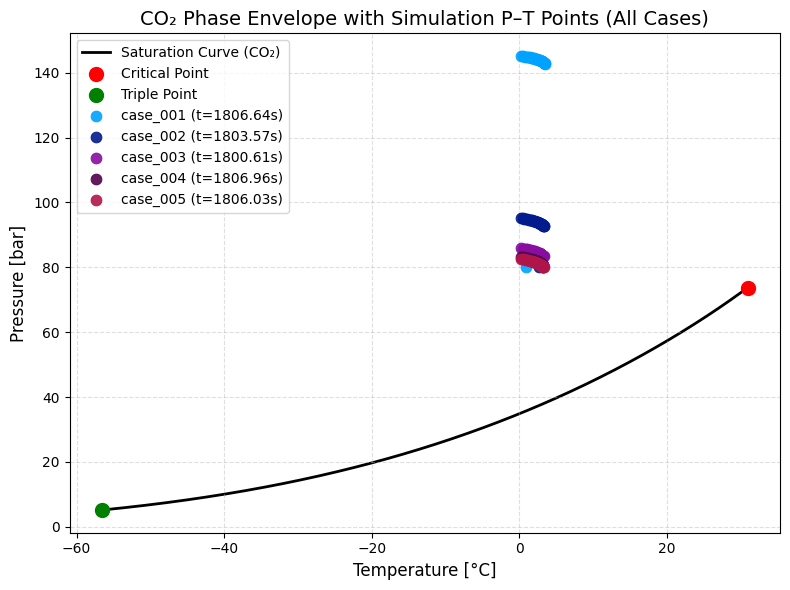

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from CoolProp.CoolProp import PropsSI
import os

# ---------------------------------------------------------
# USER INPUT: Define root folder and cases
# ---------------------------------------------------------

root = r"runs\05_12_25\run_11_24"
case_ids = ["case_001", "case_002", "case_003", "case_004", "case_005"]

profile_file = "profiles/Flowline.csv"
target_time = 1818.133966109333   # SAME timestamp across all cases


# ---------------------------------------------------------
# Helper: Load P–T points for a single case
# ---------------------------------------------------------

def load_PT_points(case_path, target_time):
    csv_path = os.path.join(case_path, profile_file)
    df = pd.read_csv(csv_path, skiprows=[1], encoding="latin1")

    df = df[["time", "position", "Pressure", "Temperature - average"]]
    df = df.dropna(subset=["Pressure", "Temperature - average"])

    # --- Find nearest time instead of exact match ---
    df["time_diff"] = abs(df["time"] - target_time)
    best_time = df.loc[df["time_diff"].idxmin(), "time"]

    df_t = df[df["time"] == best_time].sort_values("position")

    return df_t["Pressure"].values, df_t["Temperature - average"].values, best_time


# ---------------------------------------------------------
# Load P–T data for all cases
# ---------------------------------------------------------

all_pressures = []
all_temperatures = []
labels = []

for case in case_ids:
    case_path = os.path.join(root, case)
    try:
        P, T, used_time = load_PT_points(case_path, target_time)
        all_pressures.append(P)
        all_temperatures.append(T)
        labels.append(f"{case} (t={used_time:.2f}s)")
        print(f"Loaded {case} → {len(P)} points (using t={used_time:.2f})")
    except FileNotFoundError:
        print(f"WARNING: Missing file for {case}")
        continue



# ---------------------------------------------------------
# CO₂ Phase Envelope
# ---------------------------------------------------------

Ttr = PropsSI("Ttriple", "CO2")
Tcrit = PropsSI("Tcrit", "CO2")
Ptr = PropsSI("ptriple", "CO2")
Pcrit = PropsSI("pcrit", "CO2")

Tc = Tcrit - 273.15
Pc = Pcrit / 1e5
Tt = Ttr - 273.15
Pt = Ptr / 1e5

T_sat = np.linspace(Ttr, Tcrit, 400)
P_sat = []

for T in T_sat:
    try:
        P = PropsSI("P", "T", T, "Q", 0, "CO2")
        P_sat.append(P)
    except:
        P_sat.append(np.nan)

P_sat = np.array(P_sat)
T_sat_C = T_sat - 273.15
P_sat_bar = P_sat / 1e5


# ---------------------------------------------------------
# Plotting
# ---------------------------------------------------------

plt.figure(figsize=(8,6))

# Phase envelope curve
plt.plot(T_sat_C, P_sat_bar,
         color="black", linewidth=2,
         label="Saturation Curve (CO₂)", zorder=1)

# Critical point
plt.scatter(Tc, Pc, color="red",
            s=100, label="Critical Point", zorder=5)

# Triple point
plt.scatter(Tt, Pt, color="green", 
            s=100, label="Triple Point", zorder=5)

# --- Plot simulation data for ALL cases ---
colors = ["#00a2ff", "#021b8d", "#880ea0", "#52024E", "#B1164A"]

for P_bar, T_C, label, c in zip(all_pressures, all_temperatures, labels, colors):
    plt.scatter(
        T_C, P_bar,
        s=60, color=c, alpha=0.9,
        linewidth=0.7, label=label, zorder=10
    )

# Axes, formatting
plt.xlabel("Temperature [°C]", fontsize=12)
plt.ylabel("Pressure [bar]", fontsize=12)
plt.title("CO₂ Phase Envelope with Simulation P–T Points (All Cases)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4, zorder=0)
plt.legend(frameon=True, fontsize=10, loc="upper left")
plt.tight_layout()

plt.show()
